In [62]:
from os import listdir
import os
import PIL
from PIL import Image
import math
from collections import defaultdict
from matplotlib.pyplot import imshow
import numpy as np
import scipy.misc
from scipy.misc import imsave
%matplotlib inline

In [2]:
raw_dir = '/ssd/catwong/cartoonnetwork/raw_dataset/IIIT-CFW1.0/'

In [3]:
image_dirs = [
]

In [35]:
### Goal: get the first real face for each celebrity

real_faces_dir = 'realFaces'
real_faces = listdir(os.path.join(raw_dir, real_faces_dir))
all_celebrities = set([path[:-8] for path in real_faces])
# Get the JPEG paths of all of the first real photos of each celebrity
celebrity_to_real_photo = {}
for celebrity in all_celebrities:
    celebrity_to_real_photo[celebrity] = os.path.join(raw_dir, real_faces_dir, celebrity + '0001.jpg')


In [40]:
# Create pairs of real photos with each cartoon
cartoons_dir = 'fullCartoonImgsAndXMLs'
cartoons = [path for path in listdir(os.path.join(raw_dir, cartoons_dir)) if '.jpeg' in path]
real_cartoon_pairs = defaultdict(list)
for cartoon in cartoons:
    celebrity = cartoon[:-9]
    full_cartoon_path = os.path.join(raw_dir, cartoons_dir, cartoon)
    real_cartoon_pairs[celebrity].append((celebrity_to_real_photo[celebrity], full_cartoon_path))

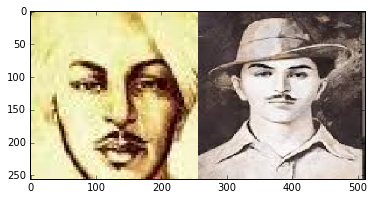

In [66]:
base_dir = '/ssd/catwong/cartoonnetwork/paired_dataset'
for i, celebrity in enumerate(real_cartoon_pairs.keys()):
    if i < 80:
        split_dir = 'train'
    elif i < 90:
        split_dir = 'val'
    else:
        split_dir = 'test'
    # Create the pairs
    for real_path, cartoon_path in real_cartoon_pairs[celebrity]:
        real_img = Image.open(real_path)
        resized_real = real_img.resize((256, 256))
        cartoon_img = Image.open(cartoon_path)
        resized_cartoon = cartoon_img.resize((256, 256))
        # Concatenate the two
        concatenated = np.hstack((np.array(resized_real), np.array(resized_cartoon)))
        
        imshow(concatenated)
        # Save the image
        new_name = "concatenated_" + cartoon_path.split("/")[-1]
        imsave(os.path.join(base_dir, split_dir, new_name), concatenated)
        